In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Sync the data
!rsync -r raven:/scratch/smavak/axlml/data/ data


Welcome to Raven, ARCCA's HPC System

This system is for authorised users, if you do not have authorised access 
please disconnect immediately and contact arcca@cardiff.ac.uk for assistance.

For new users please note the following:
 * the username contains only lowercase letters.
 * for security, the password field will stay empty whilst you type but it is
   being entered.



In [6]:
# Read in the parameters file
p_df = pd.read_csv("data/parameters.csv")
p_df.describe()

noise     probend  repetitions        seed        size       turns
count  795.000000  795.000000   795.000000  795.000000  795.000000  795.000000
mean     0.503596    0.494107    53.884277  397.000000   67.262893  102.514465
std      0.279735    0.293490    25.772629  229.641024   39.614707   58.817060
min      0.000524    0.002134    10.000000    0.000000    6.000000    1.000000
25%      0.275742    0.234343    32.000000  198.500000   34.000000   51.000000
50%      0.499869    0.487884    55.000000  397.000000   62.000000  101.000000
75%      0.734224    0.757103    75.000000  595.500000  103.000000  153.500000
max      0.998583    0.999721   100.000000  794.000000  137.000000  200.000000

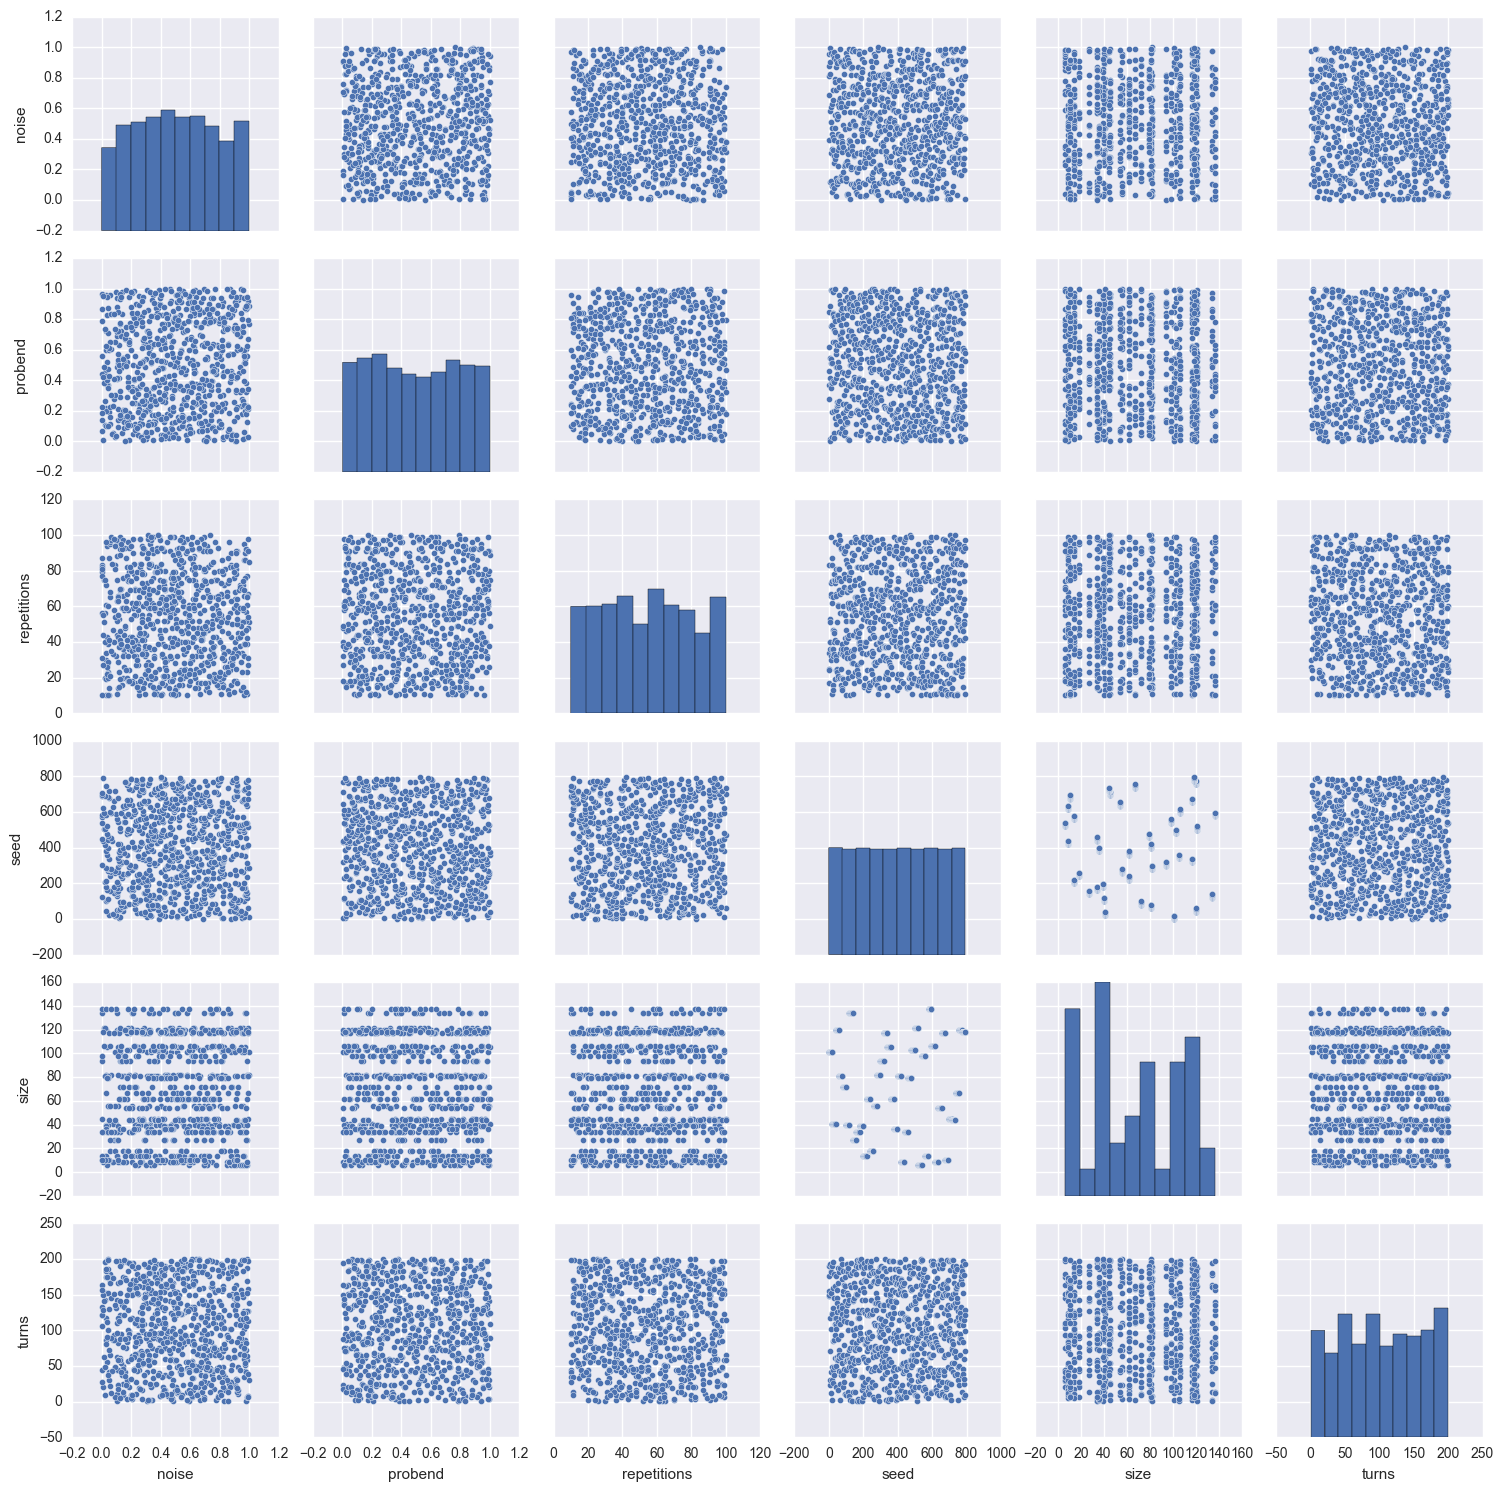

In [7]:
sns.pairplot(p_df);

In [124]:
import axelrod as axl
axl.__version__, len(axl.strategies)  # Using 1.14: 145 strategies

('1.14.0', 145)

In [125]:
played_strategies = set(pd.unique((p_df.ix[:,1:-5]).values.ravel()))
played_strategies.remove(np.nan)
strategies = set(s().__repr__() for s in axl.strategies)
len(strategies - played_strategies)  # Al strategies have been played

0

In [126]:
import networkx as nx

In [158]:
upper_bound = np.inf
adjacency_map = {key:set() for key in played_strategies}
for ind, row in p_df[p_df['size'] < upper_bound].ix[:,1:-5].iterrows():
    strats = row.dropna().tolist()
    for i, s in enumerate(strats):
        for j, opponent in enumerate(strats):
            if i != j:
                adjacency_map[s].add(opponent)

In [159]:
G = nx.Graph(adjacency_map)
components = nx.connected_components(G)
len(list(components))  # Everyone is in a single connect component

1

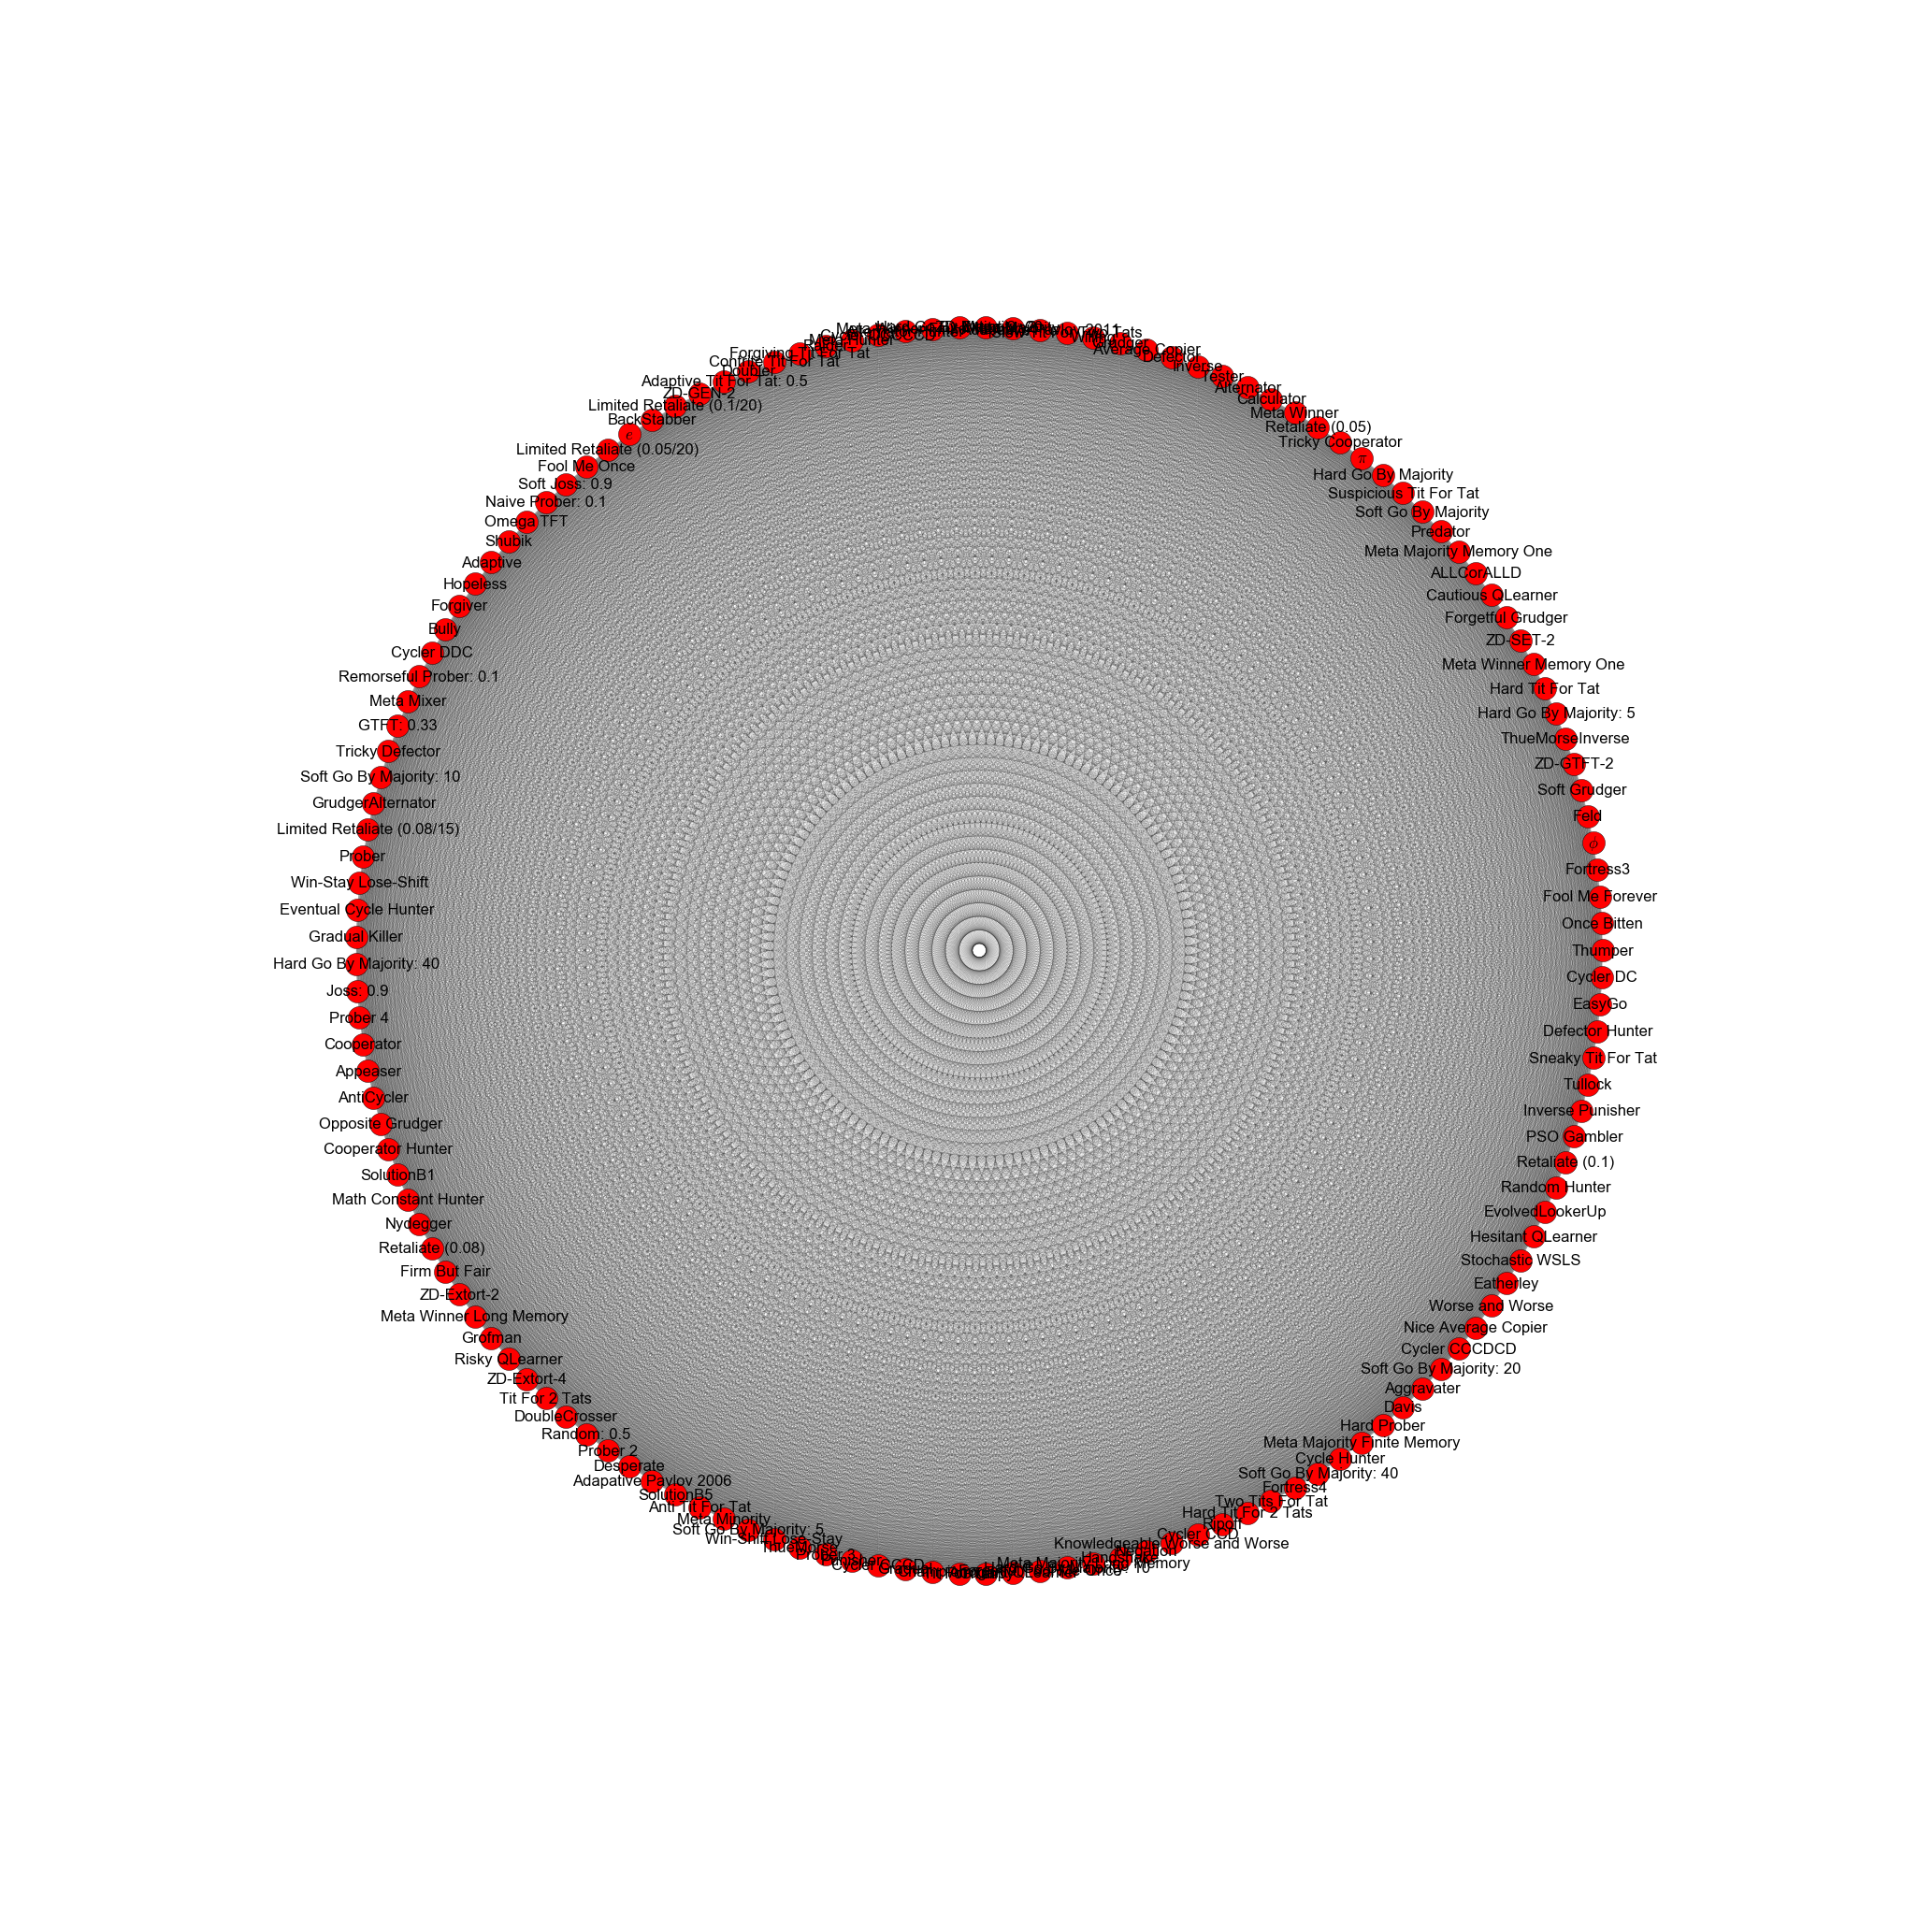

In [164]:
plt.figure(figsize=(20,20))
nx.draw_circular(G, labels={key:key for key in adjacency_map}, width=0.05)

In [165]:
n = len(G.nodes())
len(G.edges()) == n * (n - 1) / 2

True